<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Расчет-прибыли" data-toc-modified-id="Расчет-прибыли-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расчет прибыли</a></span></li><li><span><a href="#Расчет-прибыли,-рисков-убытка" data-toc-modified-id="Расчет-прибыли,-рисков-убытка-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Расчет прибыли, рисков убытка</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Нефтедобывающей компании нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Источник данных: Яндекс.Практикум

## Загрузка и подготовка данных

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_3 = pd.read_csv('/datasets/geo_data_2.csv')

Функция обзора датасета info(df) - выводит информацио о датасете, его размер, количество дубликатов  в данных и уникальные значения столбца id.

In [53]:
def info(df):
    display(df.info())
    print("Размер датасета: ", df.shape)
    print("Дубликатов в датасете: ", df.duplicated().sum())
    print("Уникальных значений столбца id в датасете: ", len(df['id'].unique()))    

**Описание данных**  

- id — уникальный идентификатор скважины;  
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);  
- product — объём запасов в скважине (тыс. баррелей).  

In [54]:
data_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [55]:
info(data_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Размер датасета:  (100000, 5)
Дубликатов в датасете:  0
Уникальных значений столбца id в датасете:  99990


In [56]:
data_1.query('id.duplicated() == True')

,id,f0,f1,f2,product
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
66136,74z30,1.084962,-0.312358,6.990771,127.643327
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
75715,Tdehs,0.112079,0.430296,3.218993,60.964018
90815,fiKDv,0.049883,0.841313,6.394613,137.346586
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008
97785,bsk9y,0.378429,0.005837,0.160827,160.637302


In [57]:
data_1.query('id == "HZww2"')

,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695


В районе № 1 полных дубликатов не обнаружено, при этом имеется 10 одинаковых id, но с разными признаками.

In [58]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


Порядок средних значений признаков f0, f1, f2 находится примерно в одном диапазоне от 0,25 до 2,5. Значения признаков могут быть как отрицательные, так и положительные. Так как природа признаков не понятна, нельзя сказать что значит отрицательное значение признака. Средние значения данных практически не отличаются от медианы в датасете 1.  
Признак f2 имеет наибольшее стандартное отклонение и наибольший максимум - 16.   
Целевой признак в регионе 1 - product - имеет медиану 92 и максимальное значение в 185 тыс. бар. запасов. 

In [59]:
data_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [60]:
info(data_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Размер датасета:  (100000, 5)
Дубликатов в датасете:  0
Уникальных значений столбца id в датасете:  99996


In [61]:
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


Датасет для региона 2 состоит из 100 тыс. строк и 5 столбцов.  
В данных по региону 2 присутствует 4 одинаковых наименований скважин. Пропущенные значения и дубликаты отсутсвуют.  
Среднее значение признака f1 - отрицательно. В датасете региона 2 средние значения признаков отличаются от медианных значений сильнее, чем признаки региона 1.  
Среднее значение целевого признака - product - в регионе 2 ниже, чем для региона 1. Так же, ниже и максимальные значения запасов сырья в регионе 2 (137 тыс. бар по сравнению с 185 тыс. бар.)

In [62]:
data_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [63]:
info(data_3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Размер датасета:  (100000, 5)
Дубликатов в датасете:  0
Уникальных значений столбца id в датасете:  99996


In [64]:
data_3.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


В датасете региона 3 имеется так же, как и в датасетах других регионов 100 тыс. строк и 5 столбцов.  
Пропущенные значения и дубликаты отсутствуют.  
Среднее значение запаса сырья в 3 регионе максимально - 95 тыс.бар., максимальное значение так же самое высокое в регионе 3 - 190 тыс. бар.   
Все признаки имеют диапазон значения от отрицательных до положительных.

Рассмотрим распределение признаков и целевого признака на графиках.

Создадим функции для построения графиков для исследования распределений признаков. 
-  **kde_df(data, title_1)** - график плотности распределения по всем столбцам датасета - на вход датасет, наименование.
- **heatmap_b(df, col, title_1)** - тепловая карта корреляции признаков и целевого признака - на вход подается датасет, список исследуемых столбцов, название графика
- **boxplot_4(df, suptitle_='Data', col=column_list)** - ящик с усами с диаграммой рассеивания для оценки выбросов в данных, медианы, межквартильного размаха признаков и целевого признака в датасете. 

In [65]:
column_list = ['f0', 'f1', 'f2', 'product'] # список наименований столбцов для построения графиков

In [66]:
def kde_df(data, title_1='Оригинальные распределения признаков', col=column_list):
    fig, (ax1) = plt.subplots(1, len(col), figsize = (22, 6))

    fig.suptitle(title_1, fontsize=16)
    
    b_colors = ['mediumblue', 'skyblue', 'darkgreen', 'lightgreen']
    
    for i in range(len(column_list)):
        kde_df = sns.kdeplot(data[column_list[i]], ax = ax1[i], shade=True, color=b_colors[i], alpha=.4)
        kde_df.set_xlabel(column_list[i], fontsize=16)
        kde_df.set_ylabel('Плотность', fontsize=16)
        kde_df.grid(color = 'lightblue', linewidth = 1, linestyle=':')
    return kde_df      

In [67]:
# оценим корреляцию признаков и целевого признака

def heatmap_b(df, col=column_list, title_1='Корреляция'):
    plt.figure(figsize=(8, 5))

    heatmap_b = sns.heatmap((df.corr()[col]), 
        vmin=-1, 
        vmax=1, 
        cmap="YlGnBu", 
        annot=True, 
        fmt='.2g')


    heatmap_b.set_title(title_1, fontdict={'fontsize':14})

    return heatmap_b

In [68]:
def boxplot_4(df, suptitle_='Data', col=column_list):  
    
    # функция по построению 4 графиков boxplot по 2 на строке
    # на вход: датасет, имя датасета, список с колонками
    
    fig, axs = plt.subplots(2, 2, figsize=(20, 7))
    
    fig.suptitle(suptitle_, fontsize=16)
    
    axs_list = [[0, 0], [0, 1], [1, 0], [1, 1]]
    
    for i in range(len(col)):

        n = axs_list[i]

        box_col = sns.boxplot(x=df[column_list[i]],  ax=axs[n[0], n[1]], color='mediumblue', linewidth=2.5)
        box_col = sns.stripplot(x=df[column_list[i]], ax=axs[n[0], n[1]], marker="o", alpha=0.05, color="skyblue")
        
        box_col.set_title(col[i], fontsize=16)
        box_col.set_xlabel('')
        box_col.grid(color = 'lightblue', linewidth = 1, linestyle=':')

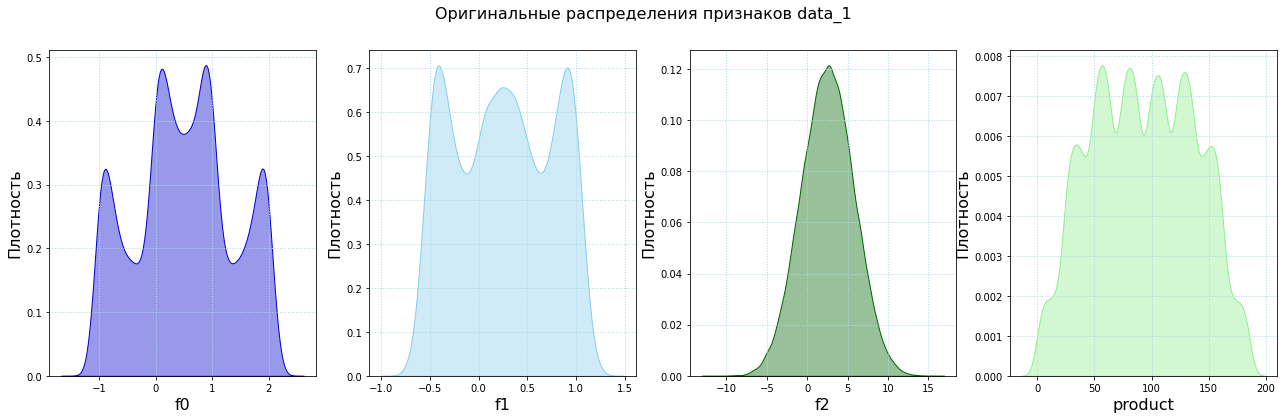

In [69]:
kde_df(data_1, title_1='Оригинальные распределения признаков data_1')
plt.show()

Распределение признаков f2 - нормальное, признаки f0 и f1 имеют несколько пиков (4 и 3 соответственно).  
Распределение значений столбца product отличается от нормального и имеет несколько пиков.

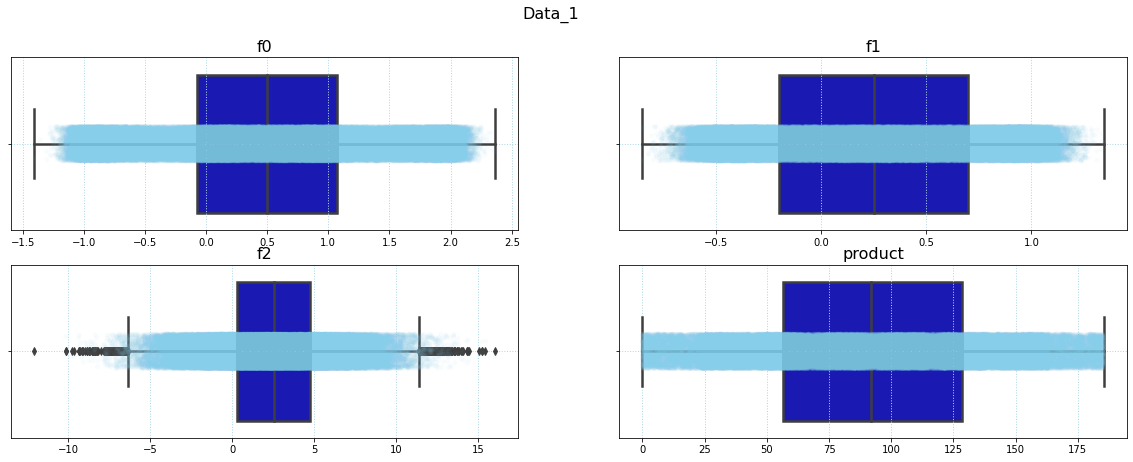

In [70]:
boxplot_4(df=data_1, suptitle_='Data_1', col=column_list)

Порядок медианного значения признаков f1, f2, f3 один.   
Имеются выбросы в данных по признаку f2. Так как природа данных неизвестна, нельзя точно сказать что означают эти выбросы.  
Медиана запасов сырья ~91 тыс. бар.

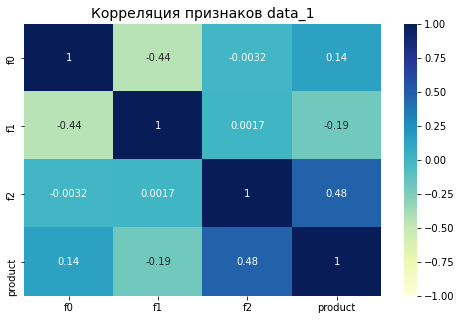

In [71]:
heatmap_b(df=data_1, col=column_list, title_1='Корреляция признаков data_1')
plt.show()

Наблюдается высокий коэффициент корреляции признака f2 с product (0,48) и признака f1 и f0 (0,44).

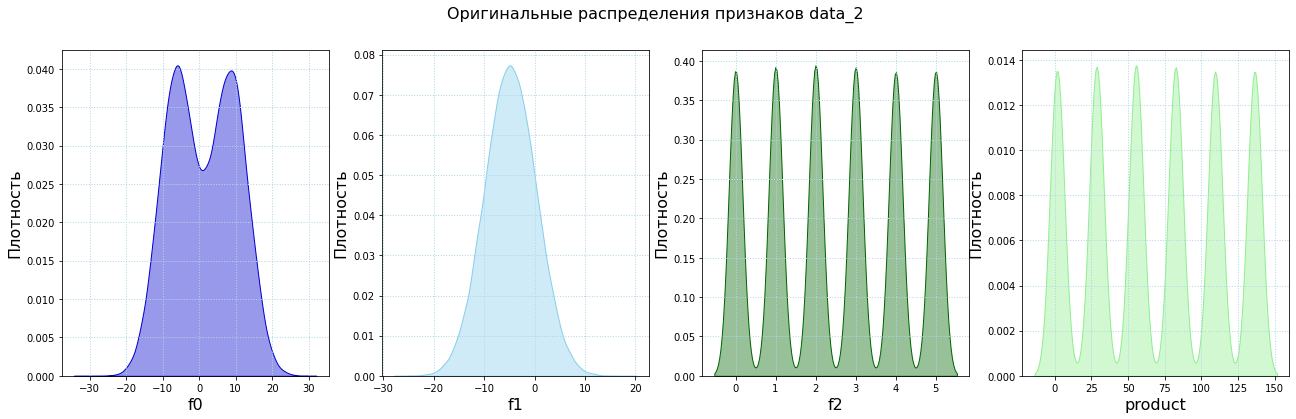

In [72]:
kde_df(data_2, title_1='Оригинальные распределения признаков data_2')
plt.show()

Распределение в регионе 2 нормальное у признака f1. Все остальные имеют несколько пиков.  
Распределение запасов сырья находится в диапазоне от 0 до 150 тыс. бар. и имеет несколько резких пиков.

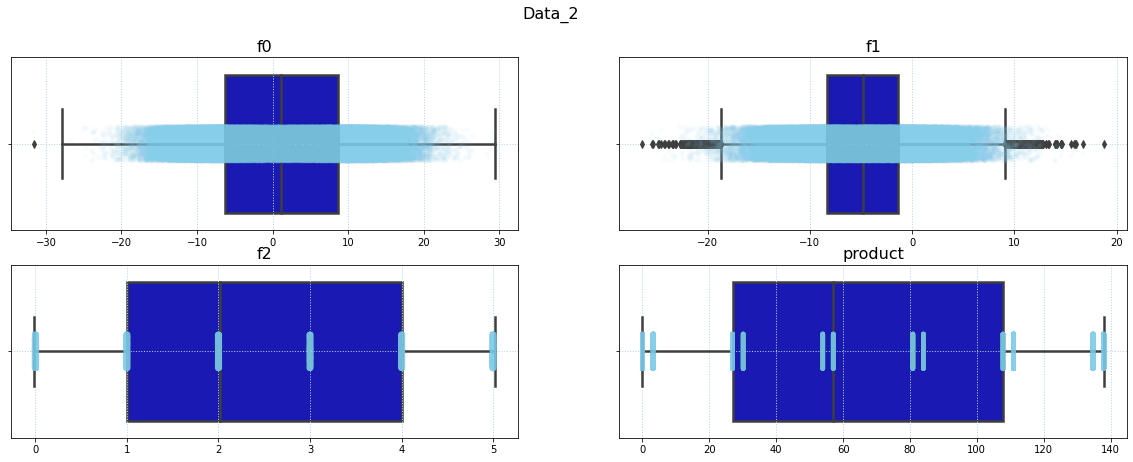

In [73]:
boxplot_4(df=data_2, suptitle_='Data_2', col=column_list)

В регионе 2 разброс запасов сырья сконцентрирован на нескольких значениях, не наблюдается слошного распределения. Вероятно, что запас в основном зависит от признака f2.  
По признаку f1 имеются выбросы в данных.  
Медиана целевого признака ~ 60 тыс. бар.

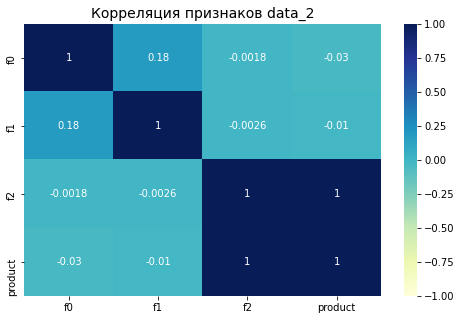

In [74]:
heatmap_b(df=data_2, col=column_list, title_1='Корреляция признаков data_2')
plt.show()

Коэффициент корреляции ~1 запасов сырья и признака f2 говорит о высокой зависимости запасов от признака f2. 

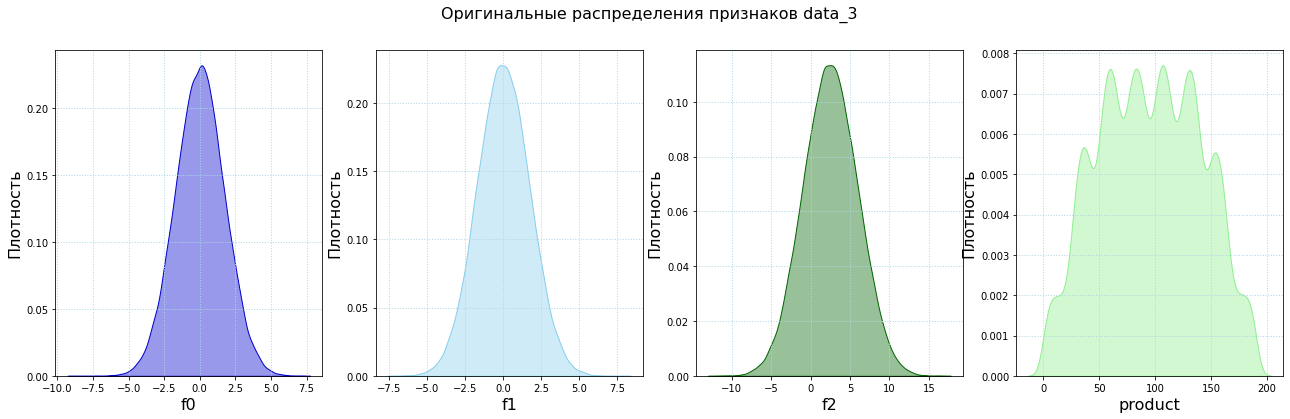

In [75]:
kde_df(data_3, title_1='Оригинальные распределения признаков data_3')
plt.show()

Все признаки по региону 3 распределены нормальнос пиком около 0.   
Целевой признак - запас сырья имеет несколько пиков, распределение значений находится в пределах от 0 до 200, примерно такое же как и в регионе 1.

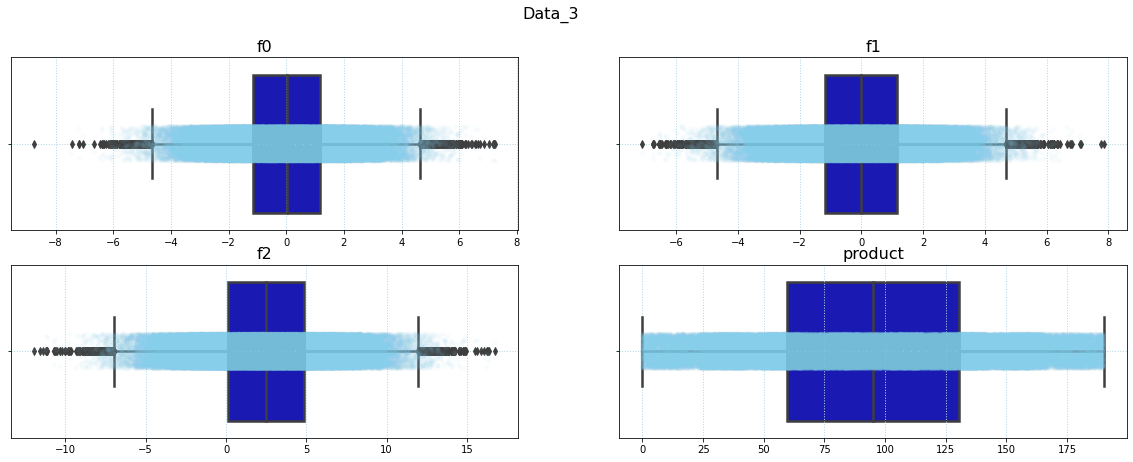

In [76]:
boxplot_4(df=data_3, suptitle_='Data_3', col=column_list)

Во всех признаках в данных региона 3 имеются выбросы.   
Медиана целевого признака 95 тыс. бар.  и максимум запасов - 190 тыс. бар. Значения запасов сырья в скважинах распределены равномерно от 0 до ~190 тыс. бар.

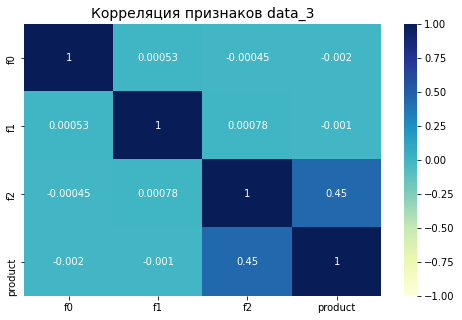

In [77]:
heatmap_b(df=data_3, col=column_list, title_1='Корреляция признаков data_3')
plt.show()

Так же, как и с другими регионами наибольший коэффициент корреляции наблюдается у product с признаком f2 - 0,45.

**Вывод**
***
- Каждый датасет содежит 100 тыс. строк и 5 столбцов.  
- Типы данных - float64.  
- Пропущенных значений, полных дубликатов не обнаружено.  
- Признак f2 имеет высокую корреляцию с целевым признаком, особенно в регионе 2 - коэф. 0.99.  
- В регионе 3 все признаки имеют выбросы в данных. Медианное значение признаков f0 и f1 около 0, f2 около 2.5 - сильных различий в среднем нет. В регионе 2 выбросы имеются в признаке f1, в регионе 1 в признаке - f2. Выбросы в целевом признаке отсутствуют в данных всех регионов.
- Распределение запасов сырья в регионах 1 и 3 находится в пределах от 0 до 200, в регионе 2 - от 0 до 150 с ярко выраженными резкими пиками.
- Распределение запасов сырья во всех регионах с несколькими пиками.
- Среднее значение запасов максимально в регионе 1 и 3 (92 тыс.бар. и 95 тыс.бар.), минимально в регионе 2 (68 тыс. бар.).
- Наблюдается, что в столбце id есть несколько повторяющихся значений. Столбец id для обучения модели не нужен, так как несет уникальную, почти не повторяющуюся информацию.

## Обучение и проверка модели

Целевой признак - количественная переменная - предсказываем объес запаса в скважинах.   
Напишем функцию для разделения исходных датасетов на выборки - 25% валидационная выборка, 75% обучающая.

In [78]:
def lg_data(data): # функция разделения датасета на целевой признак и на признаки
    features = data.drop(['id', 'product'], axis=1)
    target = data['product']
    return features, target

In [79]:
features_1, target_1 = lg_data(data_1) # делим датасеты на признаки и целевой признак product
features_2, target_2 = lg_data(data_2)
features_3, target_3 = lg_data(data_3)

features_list = [features_1, features_2, features_3]
target_list = [target_1, target_2, target_3]

Проверяем размеры разделенных на признаки датасетов по регионам.

In [80]:
for i in range(3):
    print('Регион', i+1, 'data_', i+1)
    print('Размер датасета с признаками', features_list[i].shape)
    print('Размер датасета с целевым признаком', target_list[i].shape)
    print()

Регион 1 data_ 1
Размер датасета с признаками (100000, 3)
Размер датасета с целевым признаком (100000,)

Регион 2 data_ 2
Размер датасета с признаками (100000, 3)
Размер датасета с целевым признаком (100000,)

Регион 3 data_ 3
Размер датасета с признаками (100000, 3)
Размер датасета с целевым признаком (100000,)



Функция model_LG(features, target):
- на вход подается признак - features и целевой признак target.
- функция разделяет выборку на обучающую 75% и валидационную 25%, затем выводит на экран для проверки размеры выборок.
- строит модель линейной регрессии, обучает модель на обучающей выборке, затем предсказывает значения по валидационной выборке. 
- проверяется эффективность модели двумя метриками - RMSE и R2. Так же, выводится на экран среднее значение предсказаний и оригинальной среднее запасов сырья на валидационной выборке.
- R2 - коэффициент детерминации от 0 до 1. Чем ближе к 1, тем сильнее зависимость. 
- RMSE - среднеквадратичная ошибка - чем ближе к 0, тем меньше ошибка предсказания.
- функция возвращает:  
        predictions - предсказания модели, 
        target_valid - правильные ответы валидационной выборки, 
        result - RMSE,
        mean_pred - среднее значение предсказаний сырья, 
        mean_target - среднее значение запасов сырья истиное, 
        r2_score_m - значение метрики R2.

In [81]:
def model_LG(features, target):
    
    # разделение на выборки обуч. 75% и вал. 25%
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=.25, random_state=5)
    # проверка размера выборок 
    print('Размер тренировочной выборки признаков:', features_train.shape, 
          'целевого признака:', target_train.shape, sep='\n')
    print('Размер валидационной выборки признаков:', features_valid.shape, 
          'целевого признака:', target_valid.shape, sep='\n')
    print()
    
    model = LinearRegression() # модель

    model.fit(features_train, target_train) # обучение

    predictions = model.predict(features_valid) # предсказания

    result = mean_squared_error(target_valid, predictions) ** 0.5 # RMSE
    
    mean_pred = predictions.mean() # среднее значение запасов в предсказаниях
    
    mean_target = target_valid.mean() # истиное среднее запасов
    
    r2_score_m = r2_score(target_valid, predictions) # R2
    
    print('Среднее предсказаний: {:.5f}'.format(mean_pred))
    print('Среднее оригинальное: {:.5f}'.format(mean_target))
    print('RMSE: {:.5f}'.format(result))
    print('R2 модели: {:.5f}'.format(r2_score_m))
    
    return predictions, target_valid, result, mean_pred, mean_target, r2_score_m

In [82]:
predictions_1, target_valid_1, result_1, mean_pred_1, mean_target_1, r2_score_1 = model_LG(features_1, target_1)

Размер тренировочной выборки признаков:
(75000, 3)
целевого признака:
(75000,)
Размер валидационной выборки признаков:
(25000, 3)
целевого признака:
(25000,)

Среднее предсказаний: 92.62395
Среднее оригинальное: 92.90319
RMSE: 37.80285
R2 модели: 0.27582


In [83]:
predictions_2, target_valid_2, result_2, mean_pred_2, mean_target_2, r2_score_2 = model_LG(features_2, target_2)

Размер тренировочной выборки признаков:
(75000, 3)
целевого признака:
(75000,)
Размер валидационной выборки признаков:
(25000, 3)
целевого признака:
(25000,)

Среднее предсказаний: 68.64756
Среднее оригинальное: 68.64128
RMSE: 0.89116
R2 модели: 0.99962


In [84]:
predictions_3, target_valid_3, result_3, mean_pred_3, mean_target_3, r2_score_3 = model_LG(features_3, target_3)

Размер тренировочной выборки признаков:
(75000, 3)
целевого признака:
(75000,)
Размер валидационной выборки признаков:
(25000, 3)
целевого признака:
(25000,)

Среднее предсказаний: 95.02418
Среднее оригинальное: 95.08867
RMSE: 40.27856
R2 модели: 0.19011


**Вывод**
***
- Максимальное значение средних запасов сырья в регионе 3 и 1 - 95 тыс.бар. и 92 тыс.бар. соответственно.
- Лучший результат предсказаний согласно метрик RMSE и R2 показала модель для данный региона 2. RMSE - 0,9 что говорит о высокой точности предсказаний по сравнению с предсказаниями региона 1 и 3. R2 близка к 1, что говорит о высоком качестве предсказаний. Для региона 2 наблюдался высокий коэффициент корреляции с признаком f2 - 0.99. 
- Среднеквадратичная ошибка предсказаний модели RMSE для региона 1 - 38 тыс. бар., для региона 3 - 40 тыс. бар. - в разы выше, чем для региона 2.  
- Истиные средние значения запасов сырья близки к предсказанным для всех моделей.  
- Наименьший средний запас сырья в регионе 2.

## Подготовка к расчёту прибыли

Условия задачи:  
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.  
- Бюджет на разработку скважин в регионе — 10 млрд рублей.    
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.    

Запишем в переменные условия задачи.

<a id='s1'></a>
#Переименовала константы

In [85]:
TOTAL = 500 # выборка для разведки
BEST = 200 # скважин для разработки
ONE_BAR_INCOME = 4.5*10**5 # доход с тыс. бар.
BUDGET = 10**10 # бюджет

Вычислим минимальный объем запасов в 1 скважине для безубыточной добычи.

In [86]:
vol = round((BUDGET / ONE_BAR_INCOME / BEST), 1)
print('Минимальный запас сырья в скважине для безубыточной добычи: ', vol, 'тыс. бар.')

Минимальный запас сырья в скважине для безубыточной добычи:  111.1 тыс. бар.


Сравним полученный показатель со средними значениями в каждом регионе.

In [87]:
data_mean = pd.DataFrame({'Mean_product': [mean_target_1, mean_target_2, mean_target_3], 
                          'Mean_predict': [mean_pred_1, mean_pred_2, mean_pred_3],
                          'Min_product': vol}, 
                         index=['Регион 1','Регион 2','Регион 3'])
data_mean

,Mean_product,Mean_predict,Min_product
Регион 1,92.903192,92.623947,111.1
Регион 2,68.641276,68.647565,111.1
Регион 3,95.088669,95.024178,111.1


**Вывод**
***
- Минимальный запас сырья в скважине для безубыточной разработки составил 111 тыс. бар.
- Средние значения запасов в скважинах ниже (от 68 до 95 тыс. бар.), чем минимальное необходимое количество запаса для безубыточной разработки (111,1).

## Расчёт прибыли и рисков 

### Расчет прибыли

Рассчитаем прибыль по регионам из выборки из случайных 500 скважин (на одной случайной выборке):
- Выбрать случайные 500 скважин и из них 200 с максимальными запасами по предсказанным значениям.
- Найти выбранные 200 скважин в реальных значениях target.
- Вычислить среднее максимальных запасов.
- Просуммировать все запасы и умножить на доход с единицы и вычесть бюджет на разработку.

Функция total_income для подсчета прибыли разработки n месторождений: 
- predictions - предсказания модели для региона
- target_real - истиные значения запасов сырья
- num_sample - длина случайной выборки (500)
- num - количество скважин для разработки 
- income_per_unit - доход с тыс. бар.
- gen_budget - бюджет на разработку 200 скважин  
- reg - регион для разработки

На выходе - датафрейм с показателями:
- Минимальный запас для безубыточной разработки, 
- Средний запас сырья в скважине,
- Общий запас сырья в лучших скважинах,
- Прибыль от разработки  
Возвращает так же - средний запас в 200 скважинах, суммарный запас в 200 скважинах, общий доход от разработки выбранных 200 скважин.

In [88]:
def total_income(predictions, target_real, num_sample=TOTAL, num=BEST, 
                 income_per_unit=ONE_BAR_INCOME, gen_budget=BUDGET, reg='Регион'):
    
    predictions = pd.Series(predictions) # Series с предсказаниями
    
    target_valid_f = target_real.reset_index(drop=True) # сброс индексов для целевого признака вал. выборки
    
    view_500 = predictions.sample(
        n=num_sample, random_state=5).sort_values(ascending=False).head(num) # выбор случайных 500 скважин 
    
    best_num = target_valid_f[view_500.index]
    
    mean_num = best_num.mean() # средний запас в 200 лучших скважинах
    
    sum_num = best_num.sum()# суммарный запас в 200 лучших скважинах
    
    total_income = sum_num * income_per_unit - gen_budget # общий доход от разработки 
    
    data_income = pd.DataFrame({reg: [vol, mean_num, sum_num, total_income]}, 
                         index=['Минимальный запас для безубыточной разработки', 
                                'Средний запас сырья в скважине',
                                'Общий запас сырья в лучших скважинах',
                                'Прибыль от разработки'])
    
    return mean_num, sum_num, total_income, data_income

In [89]:
pd.options.display.float_format ='{:,.3f}'.format

In [90]:
mean_1, sum_1, total_income_1, data_income_1 = total_income(predictions_1, target_valid_1, reg='Регион_1')
mean_2, sum_2, total_income_2, data_income_2 = total_income(predictions_2, target_valid_2, reg='Регион_2')
mean_3, sum_3, total_income_3, data_income_3 = total_income(predictions_3, target_valid_3, reg='Регион_3')

In [91]:
data_income_1.join([data_income_2, data_income_3])

,Регион_1,Регион_2,Регион_3
Минимальный запас для безубыточной разработки,111.100,111.100,111.100
Средний запас сырья в скважине,120.994,113.779,118.026
Общий запас сырья в лучших скважинах,"24,198.862","22,755.878","23,605.129"
Прибыль от разработки,"889,487,931.533","240,145,130.936","622,308,098.110"


### Расчет прибыли, рисков убытка

Применим технику Bootstrap на 1000 выборок случайных 500 скважин. Рассчитаем 95% доверительный интервал и риск убытков по регионам - выберем регион с риском убытков менее 2.5 %.

Функция revenue расчета прибыли:
- target - Series значений запасов сырья
- income_per_unit - доход за тыс. бар. (по умолчанию 4,5*10**5)
- gen_budget - бюджет на разработку (по умолчанию 10**10)

In [92]:
def revenue(target, income_per_unit=ONE_BAR_INCOME, gen_budget=BUDGET):
    
    return target.sum() * income_per_unit - gen_budget

Далее применим технику бутстрап на 1000 выборках. Вычислим риски и доходы по регионам.  
Найдем 95% доверительный интервал и риск убытков по регионам.  

Функция risks - расчет прибыли с помощью техники Bootstrap на 1000 выборках, расчет 95% доверительного интервала прибыли и риска убытков. Подается на вход: 
- predictions - предсказания запасов сырья на валидационной выборке
- target_valid - истиные значения запасов на валидационной выборке
- num_view=total - длина выборки - количество случайно отобранных скважин
- num_best=best - 200 скважин с максимальными запасами по предсказаниям
- reg='Регион' - название региона

Функция выводит на экран значения:
- Средней прибыли
- Доверительного интервала прибыли 
- Риска убытков   

Возвращает список общей прибыли/убытков от разработки 200 скважин в регионе по предсказаниям и по истиным значениям.


In [94]:
def risks(predictions, target_valid, num_view=TOTAL, num_best=BEST, reg='Регион'):
    
    target_valid_f = target_valid.reset_index(drop=True)

    predictions_f = pd.Series(predictions)
    
    values_real = []
    values_pred = []
    
    state = np.random.RandomState(5)

    alpha = 0.05

    for i in range(1000):

        # выборка из 500 скважин, и выбор 200 c наибольшим запасом сырья
        pred_subsample = predictions_f.sample(
            n=num_view, replace=True, random_state=state).sort_values(ascending=False).head(num_best)

        targ_subsample = target_valid_f[pred_subsample.index]

        res_real = revenue(targ_subsample)
        res_pred = revenue(pred_subsample)
        
        values_real.append(res_real)
        values_pred.append(res_pred)
        
    values_real = pd.Series(values_real)
    values_pred = pd.Series(values_pred)
    
    mean = values_real.mean()

    prob = (values_real < 0).mean() 
    
    upper = values_real.quantile(1 - alpha / 2) # расчет верхней границы дов. интервала по реальным значениям запасов
    lower = values_real.quantile(alpha / 2) # расчет нижней границы дов. интервала по реальным значениям запасов
    
    
    print("Средняя прибыль: {:,.2f}".format(mean))
    print("Доверительный интервал прибыли: {:,.2f}".format(lower), '- {:,.2f}'.format(upper))
    print("Риск убытков: {:.1%}".format(prob))

    return values_real, values_pred

In [95]:
values_real_1, values_pred_1 = risks(predictions_1, target_valid_1)

Средняя прибыль: 457,194,862.49
Доверительный интервал прибыли: -75,265,842.65 - 957,514,499.39
Риск убытков: 4.3%


In [96]:
values_real_2, values_pred_2 = risks(predictions_2, target_valid_2)

Средняя прибыль: 424,216,766.97
Доверительный интервал прибыли: 51,020,318.26 - 829,658,044.57
Риск убытков: 1.2%


In [97]:
values_real_3, values_pred_3 = risks(predictions_3, target_valid_3)

Средняя прибыль: 334,052,183.88
Доверительный интервал прибыли: -170,750,641.65 - 856,729,544.65
Риск убытков: 11.3%


- В 95% доверительный интервал не попали отрицательные значения (убытки) только по региону 2. 
- Риск получить убытки по региону 2 самый низкий из всех - 1.2%. 
- Самая высокая средняя прибыль в регионе 1, но риск получить убытки выше -4,3%.  

Построим гистограмму распределения прибыли по предсказанным и по истинным значениям запасов сырья.

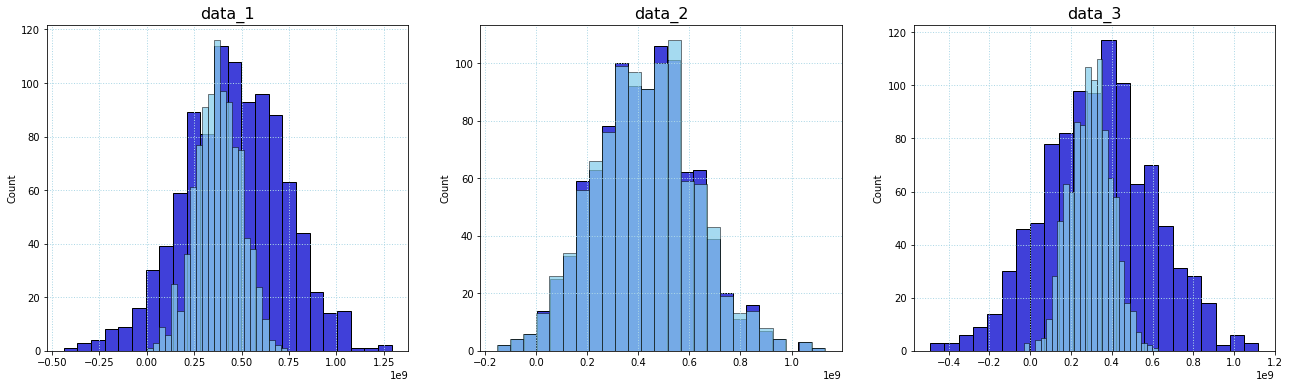

In [98]:
real = [values_real_1, values_real_2, values_real_3]
pre = [values_pred_1, values_pred_2, values_pred_3]

fig, (ax1) = plt.subplots(1, len(real), figsize = (22, 6))

for i in range(len(real)):    

    a = sns.histplot(real[i], legend=True, ax=ax1[i], color='mediumblue')
    a = sns.histplot(pre[i], legend=True, ax=ax1[i], color='skyblue', linewidth=.5)
    a.grid(color = 'lightblue', linewidth = 1, linestyle=':')
    a.set_title('data_'+ str(i+1), fontsize=16)

Значения прибыли по предсказаниям и по истиным значениям почти совпали по региону 2.  
В регионах 1 и 3 разброс истиных значений прибыли значительно выше, чем предсказаний.

**Вывод**
***
При применении техники бутстреп были получены следующие результаты:
- наименьший риск получения убытков при разработке 200 скважин в регионе 2 он составил 1.2 %. Риск убытков в регионе 1 - 4.3 %, в регионе 3 - 11.3 %.
- наибольшая выручка в регионе 1 - 457,194,862 руб. Выручка в регионе 2 с наименьшим риском убытков - 424,216,766.
- разброс истиных значений и предсказаний прибыли приближены друг к другу в регионе 2.
- 95% доверительный интервал в регионе 2 - 51,020,318 руб. - 829,658,044 руб.

По итогу исследоавния рекомендуется к разработке регион 2.

## Вывод

Целью исследования было выбрать регион для разработки нефтяных скважин с наименьшими рисками по получению убытков при реализации продукта. 
- В ходе исследования была построена модель линейной регрессии и предсказаны значения запасов сырья в скважинах. Лучший результат предсказаний согласно метрик RMSE и R2 показала модель для данный региона 2. Максимальные средние значения запасов сырья по валидационной выборке в 25% от всех данных у региона 1 и 3 - 92 тыс.бар. и 95 тыс.бар. соответственно.  
- Минимальный запас сырья в скважине для безубыточной добычи:  111.1 тыс. бар.  
- При применении техники бутстреп были получены следующие реузльтаты: 
    - риск получить убытки по региону 2 самый низкий из всех - 1.2%. 
    - прибыль в регионе 1 составила 424,216,766 руб.   
    - наибольшую прибыль показал регион 1 в 457,194,862 руб., но риск разработки в регионе 1 слишком высок - 4.3%.
    - 95% доверительный интервал региона 2 - 51,020,318 руб. - 829,658,044 руб.  
    - риск получения убытков при разработке скважин в регионе 3 самый высоких из всех - 11.3 %.    
    
По итогам исследования рекомендуется к разработке регион № 2.    